In [1]:
import argparse
import urllib.request, json
import pandas as pd
import geopandas as gpd
import xarray as xr
import odc.aws
from pprint import pprint
from datacube.testutils.io import rio_slurp_xarray
import glob, os
import rasterio
import shutil
import pathlib

In [2]:
# odc-stac library downloads DEA datasets stored in AWS
# when external to AWS (like outside DEA sandbox), AWS signed requests must be disabled
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

In [3]:
#wrs2 = gpd.read_file("D:\data\wrs2_pathrow\wrs2_au_02.shp")

wrs2 = gpd.read_file("D:\data\wrs2_pathrow\WRS2_AU_centroid_buff50m.shp") 
    
path_row = wrs2[(wrs2['WRSPR'] == 112084)]
bbox = list(path_row.total_bounds)
print (bbox)

[115.82845828887596, -34.614250769203935, 115.82954647186624, -34.613349328418984]


In [5]:
s2g = gpd.read_file("D:\data\AUS_Sentinel2_Tiles_Geom\AUS_Sentinel2_Tiles_GeomBuff.shp")

In [6]:
select = s2g[(s2g['scene'] == 't52lgm')]
bbox = list(select.total_bounds)
print (bbox)

[131.3425436798841, -12.246251998778082, 131.3434609587878, -12.245348037828132]


In [22]:
#product = 'ga_ls5t_ard_3'
#product = 'ga_ls7e_ard_3'
#product = 'ga_ls8c_ard_3'
#product = 'ga_ls9c_ard_3'
product = 'ga_s2am_ard_3'
#product = 'ga_s2bm_ard_3'
start_time = '2023-09-01'
end_time = '2024-02-07'
bbox = bbox

In [23]:
root_url = 'https://explorer.dea.ga.gov.au/stac'
stac_url = f'{root_url}/search?collection={product}&time={start_time}/{end_time}&bbox={str(bbox).replace(" ", "")}&limit=80'
print(stac_url)

https://explorer.dea.ga.gov.au/stac/search?collection=ga_s2am_ard_3&time=2023-09-01/2024-02-07&bbox=[131.3425436798841,-12.246251998778082,131.3434609587878,-12.245348037828132]&limit=80


In [24]:
with urllib.request.urlopen(stac_url) as url:
    data = json.loads(url.read().decode())
pprint(data, depth=1)

{'context': {...},
 'features': [...],
 'links': [...],
 'numberMatched': 16,
 'numberReturned': 16,
 'type': 'FeatureCollection'}


<AxesSubplot:>

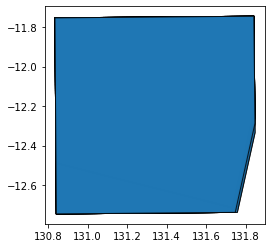

In [25]:
# Convert features to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(data['features'])

# Plot the footprints of each dataset
gdf.plot(alpha=0.8, edgecolor='black')

<AxesSubplot:>

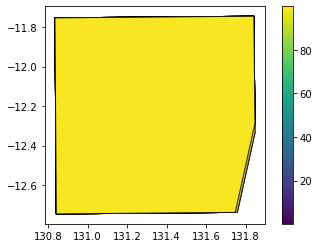

In [26]:
# Colour features by cloud cover
gdf.plot(column='eo:cloud_cover',
         cmap='viridis',
         alpha=0.8,
         edgecolor='black',
         legend=True)

In [27]:
gdf

,geometry,title,gsd,created,gqa:abs_x,gqa:abs_y,gqa:cep90,proj:epsg,fmask:snow,gqa:abs_xy,...,gqa:abs_iterative_mean_x,gqa:abs_iterative_mean_y,gqa:abs_iterative_mean_xy,sentinel:sentinel_tile_id,sentinel:datatake_start_datetime,cubedash:region_code,datetime,sentinel:utm_zone,sentinel:grid_square,sentinel:latitude_band
0,"POLYGON ((131.84675 -12.21821, 131.84677 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-09-01_final,10.0,2023-09-11T09:58:06.308205Z,1.08,0.78,1.69,32752,0.924912,1.33,...,0.58,0.49,0.76,S2A_OPER_MSI_L1C_TL_2APS_20230901T053509_A0427...,2023-09-01T05:35:09Z,52LGM,2023-09-01T01:40:48.740301Z,NaN,NaN,NaN
1,"POLYGON ((131.84657 -12.20175, 131.84659 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-09-11_final,10.0,2023-09-21T17:58:03.433019Z,0.68,0.86,1.03,32752,1.086268,1.09,...,0.36,0.46,0.58,S2A_OPER_MSI_L1C_TL_2APS_20230911T035026_A0429...,2023-09-11T03:50:26Z,52LGM,2023-09-11T01:40:48.479862Z,NaN,NaN,NaN
2,"POLYGON ((131.84697 -12.23878, 131.84699 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-09-21_final,10.0,2023-10-01T10:13:33.806692Z,0.67,0.75,0.97,32752,0.392078,1.01,...,0.32,0.41,0.52,S2A_OPER_MSI_L1C_TL_2APS_20230921T035128_A0430...,2023-09-21T03:51:28Z,52LGM,2023-09-21T01:40:45.358965Z,NaN,NaN,NaN
3,"POLYGON ((131.74038 -12.71087, 131.73431 -12.7...",ga_s2am_ard_3-2-1_52LGM_2023-10-01_final,10.0,2023-10-11T10:31:32.416087Z,1.17,1.19,1.91,32752,2.878488,1.67,...,0.58,0.60,0.83,S2A_OPER_MSI_L1C_TL_2APS_20231001T030536_A0432...,2023-10-01T03:05:36Z,52LGM,2023-10-01T01:40:45.694946Z,NaN,NaN,NaN
4,"POLYGON ((131.84752 -12.28953, 131.84753 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-10-11_final,10.0,2023-10-22T10:00:09.343942Z,1.20,1.37,3.43,32752,19.049071,1.82,...,0.74,0.80,1.09,S2A_OPER_MSI_L1C_TL_2APS_20231011T030449_A0433...,2023-10-11T03:04:49Z,52LGM,2023-10-11T01:40:42.172464Z,NaN,NaN,NaN
5,"POLYGON ((131.84720 -12.25973, 131.84721 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-10-21_final,10.0,2023-10-31T09:54:20.382822Z,0.73,0.79,1.01,32752,10.630385,1.08,...,0.36,0.34,0.50,S2A_OPER_MSI_L1C_TL_2APS_20231021T030454_A0435...,2023-10-21T03:04:54Z,52LGM,2023-10-21T01:40:43.521520Z,NaN,NaN,NaN
6,"POLYGON ((131.84719 -12.25901, 131.84721 -12.2...",ga_s2am_ard_3-2-1_52LGM_2023-10-31_final,10.0,2023-11-10T10:05:12.048887Z,1.30,1.42,1.63,32752,23.557998,1.92,...,0.51,0.54,0.74,S2A_OPER_MSI_L1C_TL_2APS_20231031T030443_A0436...,2023-10-31T03:04:43Z,52LGM,2023-10-31T01:40:42.924847Z,NaN,NaN,NaN
7,"POLYGON ((131.73940 -12.72273, 131.73594 -12.7...",ga_s2am_ard_3-2-1_52LGM_2023-11-10_final,10.0,2023-11-20T09:56:02.584110Z,4.68,9.19,13.82,32752,0.001309,10.31,...,4.69,9.27,10.39,S2A_OPER_MSI_L1C_TL_2APS_20231110T030239_A0437...,2023-11-10T03:02:39Z,52LGM,2023-11-10T01:40:42.988577Z,NaN,NaN,NaN
8,"POLYGON ((130.84351 -12.48881, 130.83996 -12.4...",ga_s2am_ard_3-2-1_52LGM_2023-11-20_final,10.0,2023-11-30T11:08:38.338276Z,1.25,1.26,1.92,32752,8.711479,1.78,...,0.59,0.53,0.79,S2A_OPER_MSI_L1C_TL_2APS_20231120T025923_A0439...,2023-11-20T02:59:23Z,52LGM,2023-11-20T01:40:39.459422Z,NaN,NaN,NaN
9,"POLYGON ((131.84800 -12.33467, 131.84802 -12.3...",ga_s2am_ard_3-2-1_52LGM_2023-11-30_final,10.0,2023-12-10T10:53:32.940269Z,0.84,0.97,1.08,32752,14.804860,1.28,...,0.34,0.38,0.51,S2A_OPER_MSI_L1C_TL_2APS_20231130T030141_A0440...,2023-11-30T03:01:41Z,52LGM,2023-11-30T01:40:35.183776Z,NaN,NaN,NaN


In [28]:
gdf.index

RangeIndex(start=0, stop=16, step=1)

In [30]:
cl = gdf[(gdf['eo:cloud_cover'] < 50)]

In [31]:
cl.index
#select =[6]

Int64Index([0, 1, 2, 3, 4, 5, 6, 9, 10], dtype='int64')

index: 0  Image: ga_s2am_nbart_3-2-1_52LGM_2023-09-01_final_thumbnail.jpg


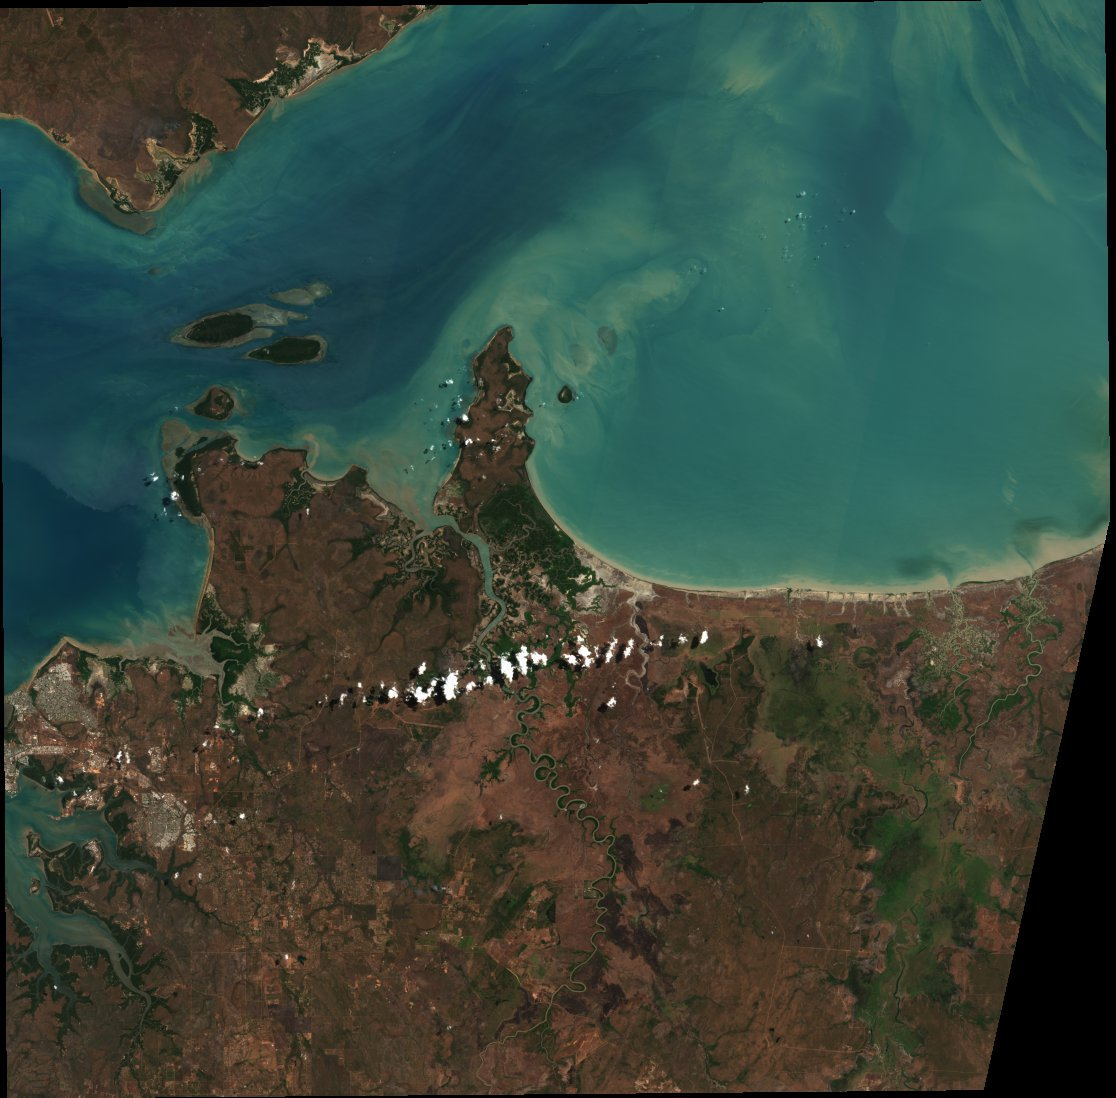

index: 1  Image: ga_s2am_nbart_3-2-1_52LGM_2023-09-11_final_thumbnail.jpg


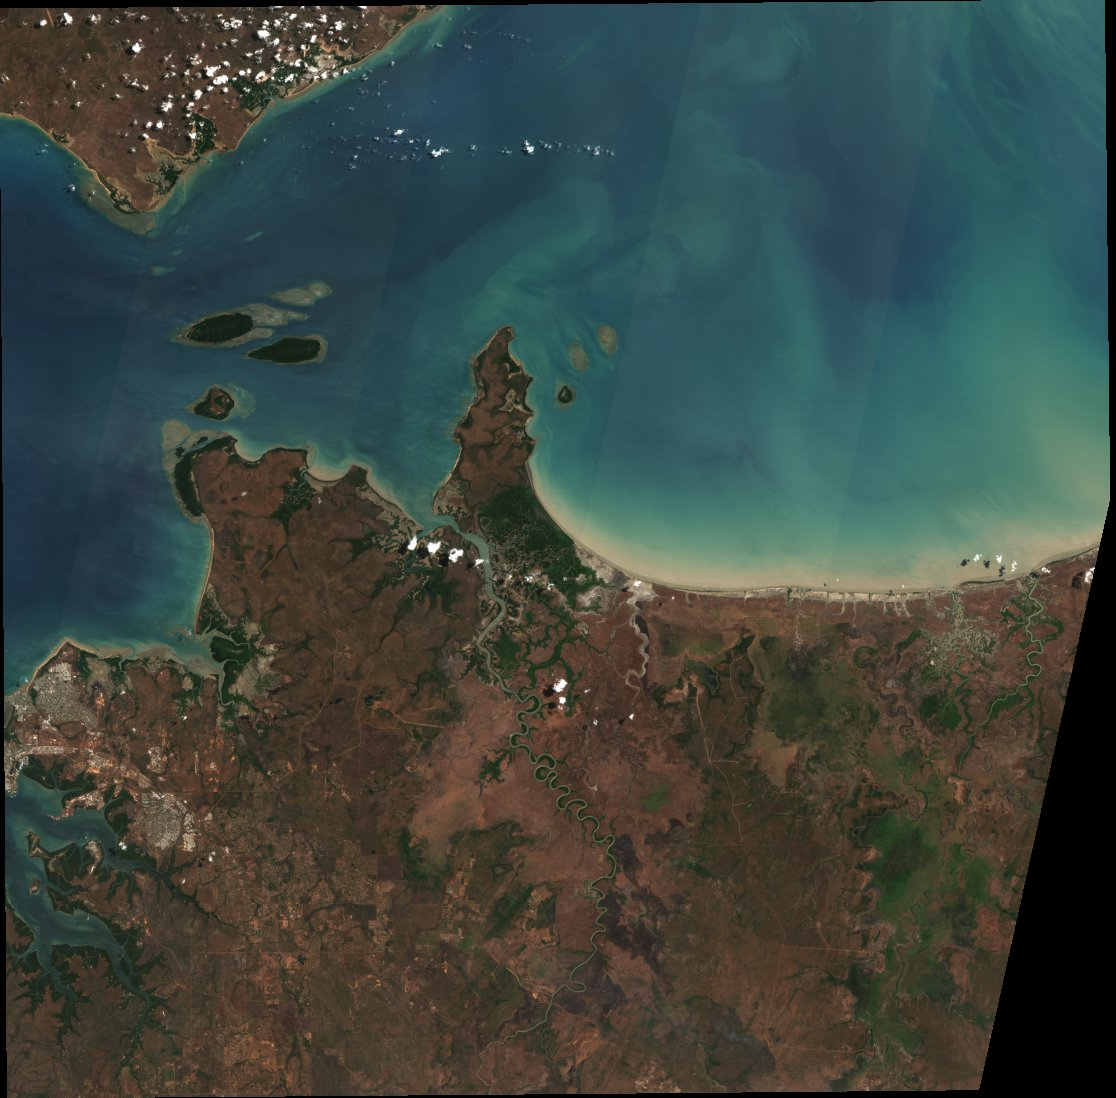

index: 2  Image: ga_s2am_nbart_3-2-1_52LGM_2023-09-21_final_thumbnail.jpg


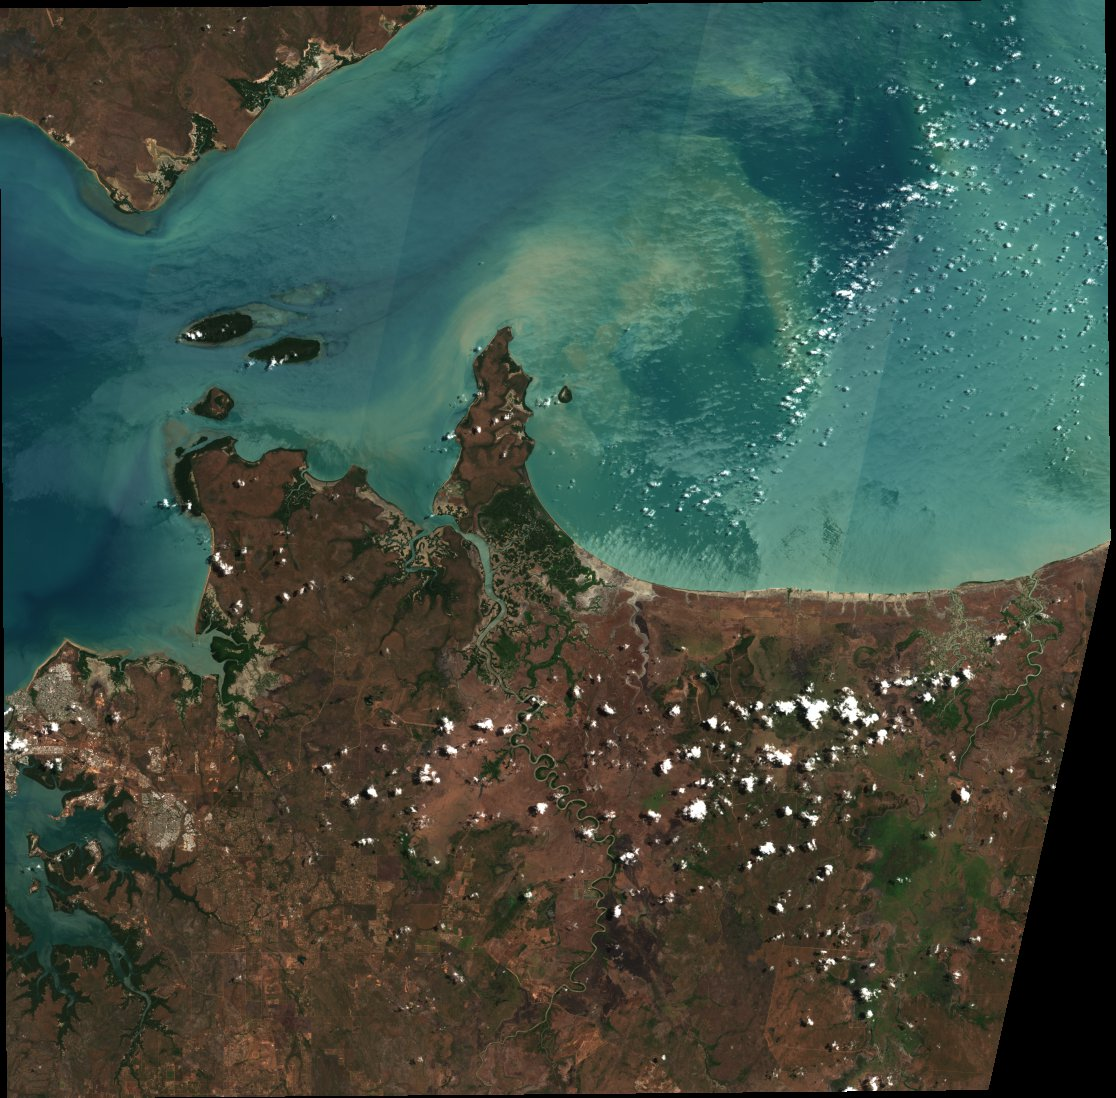

index: 3  Image: ga_s2am_nbart_3-2-1_52LGM_2023-10-01_final_thumbnail.jpg


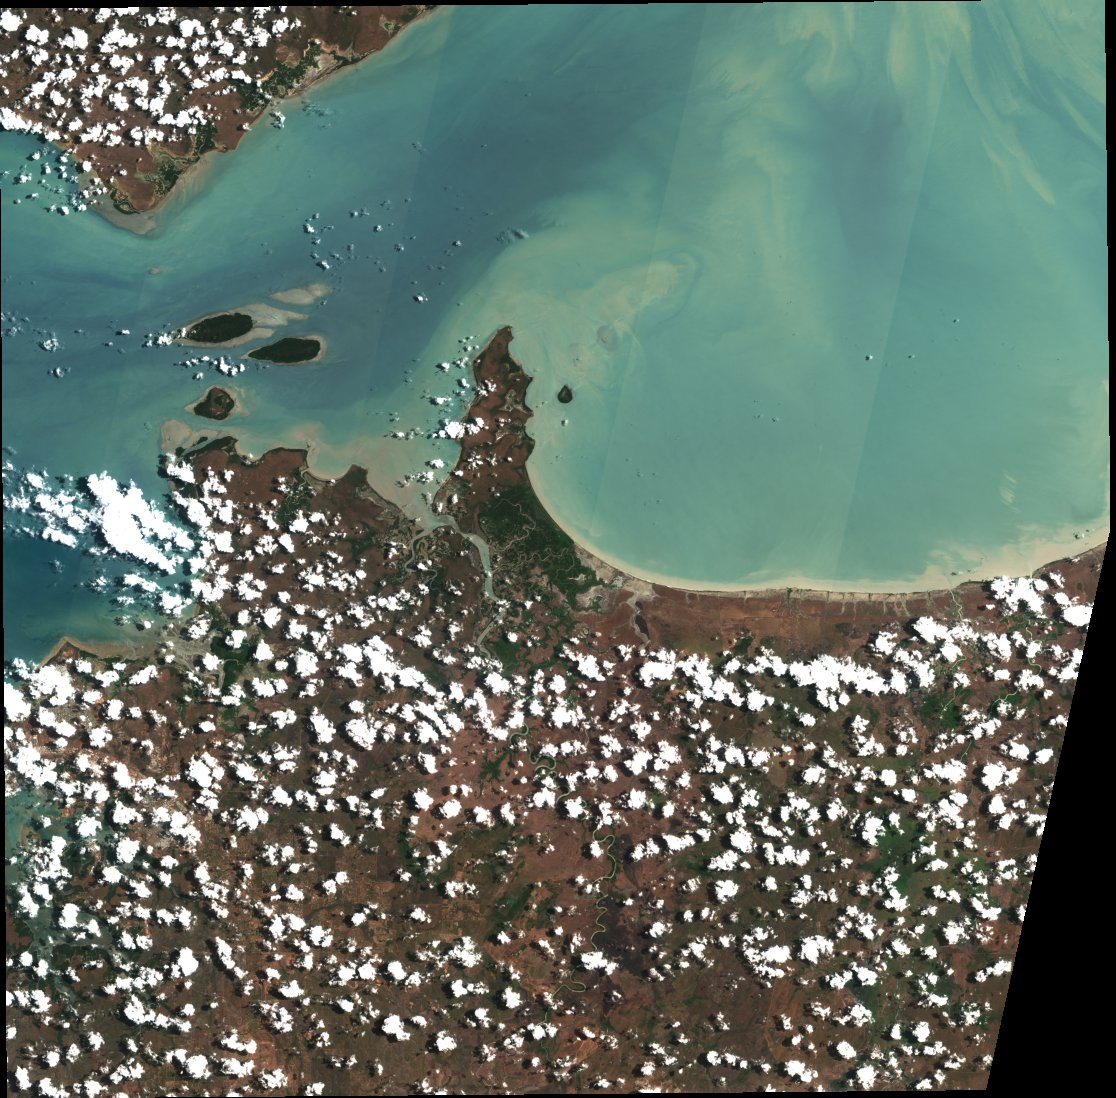

index: 4  Image: ga_s2am_nbart_3-2-1_52LGM_2023-10-11_final_thumbnail.jpg


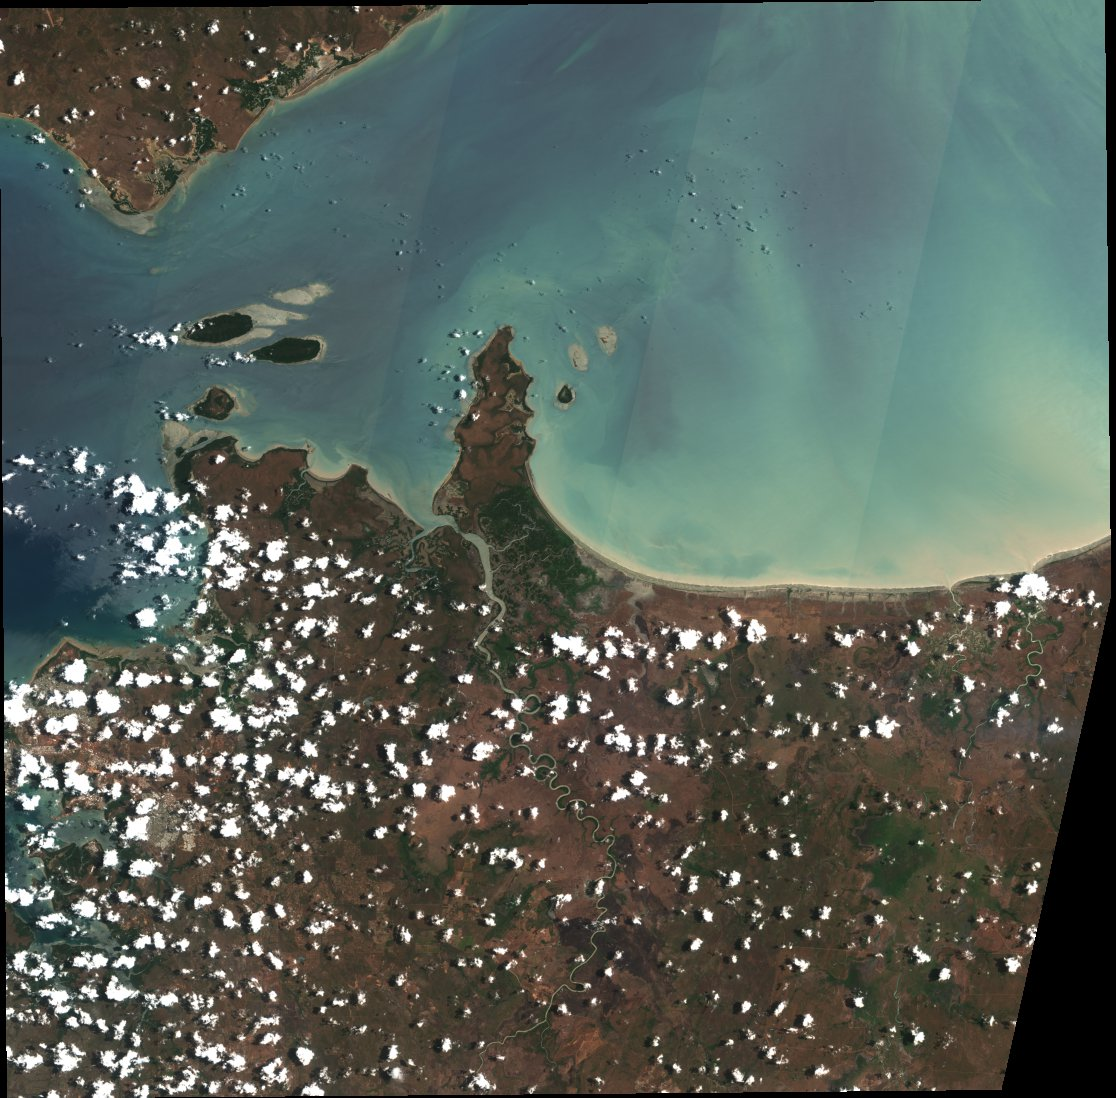

index: 5  Image: ga_s2am_nbart_3-2-1_52LGM_2023-10-21_final_thumbnail.jpg


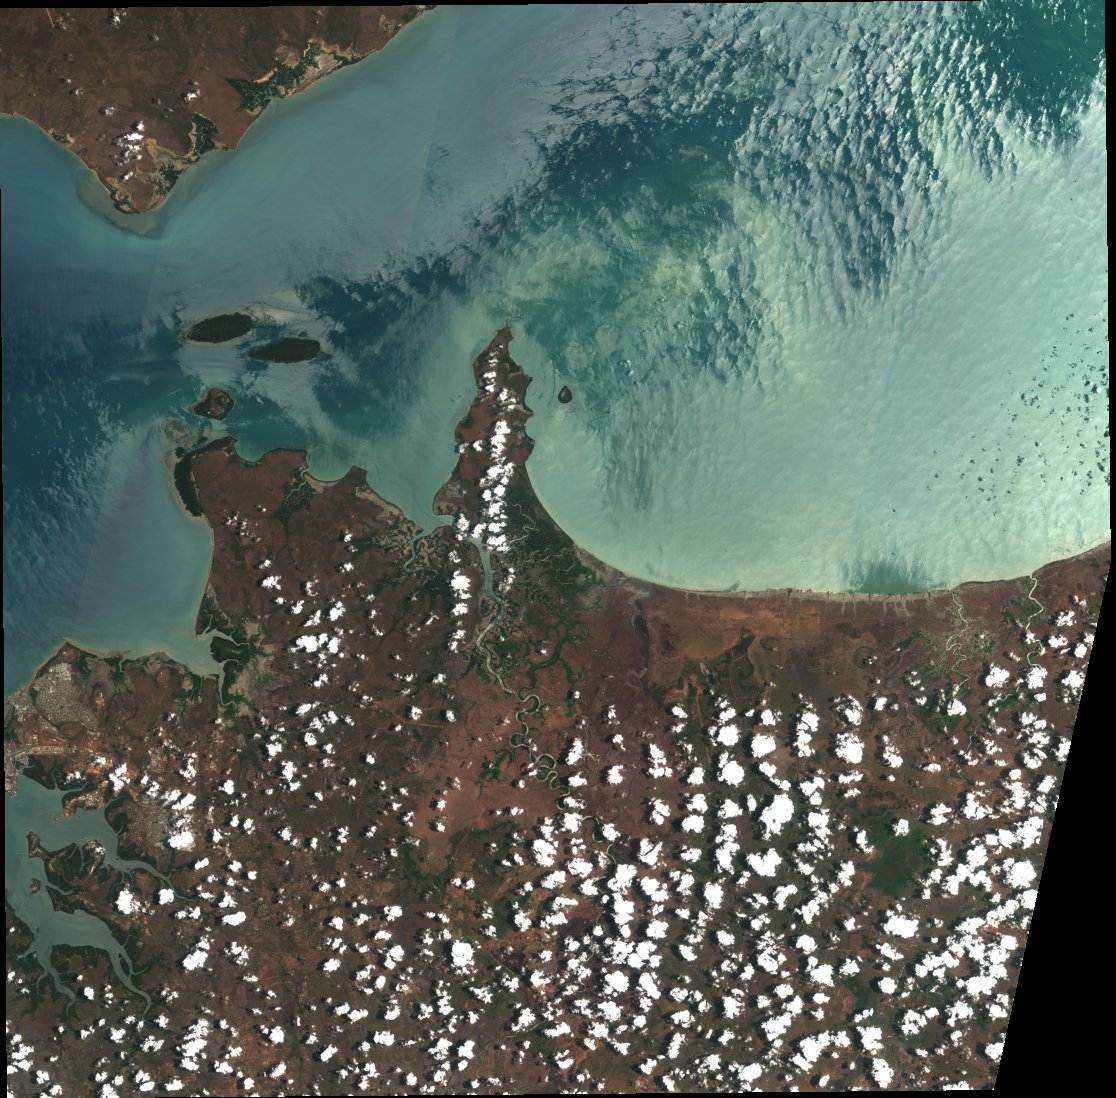

index: 6  Image: ga_s2am_nbart_3-2-1_52LGM_2023-10-31_final_thumbnail.jpg


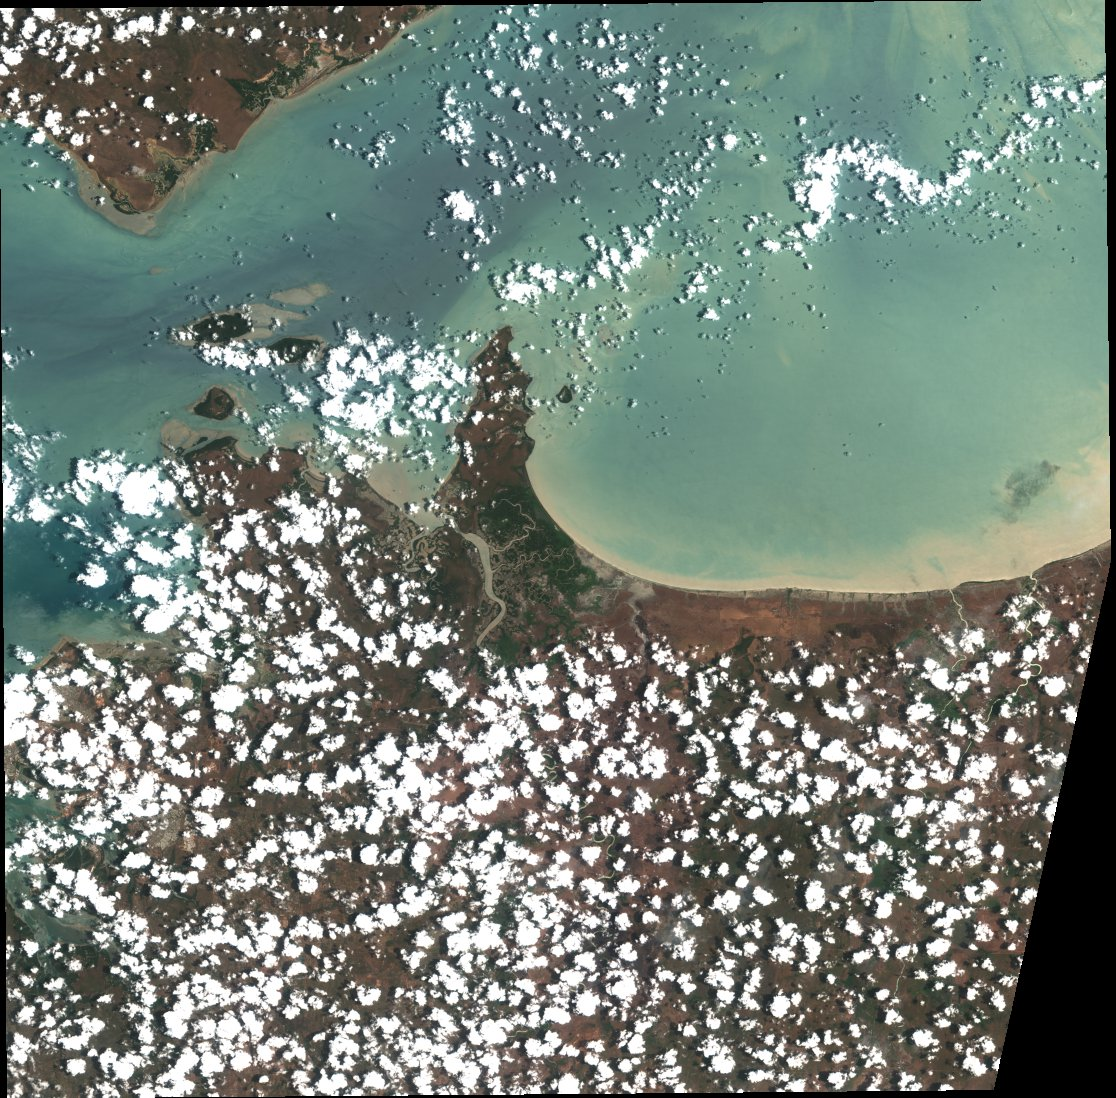

index: 9  Image: ga_s2am_nbart_3-2-1_52LGM_2023-11-30_final_thumbnail.jpg


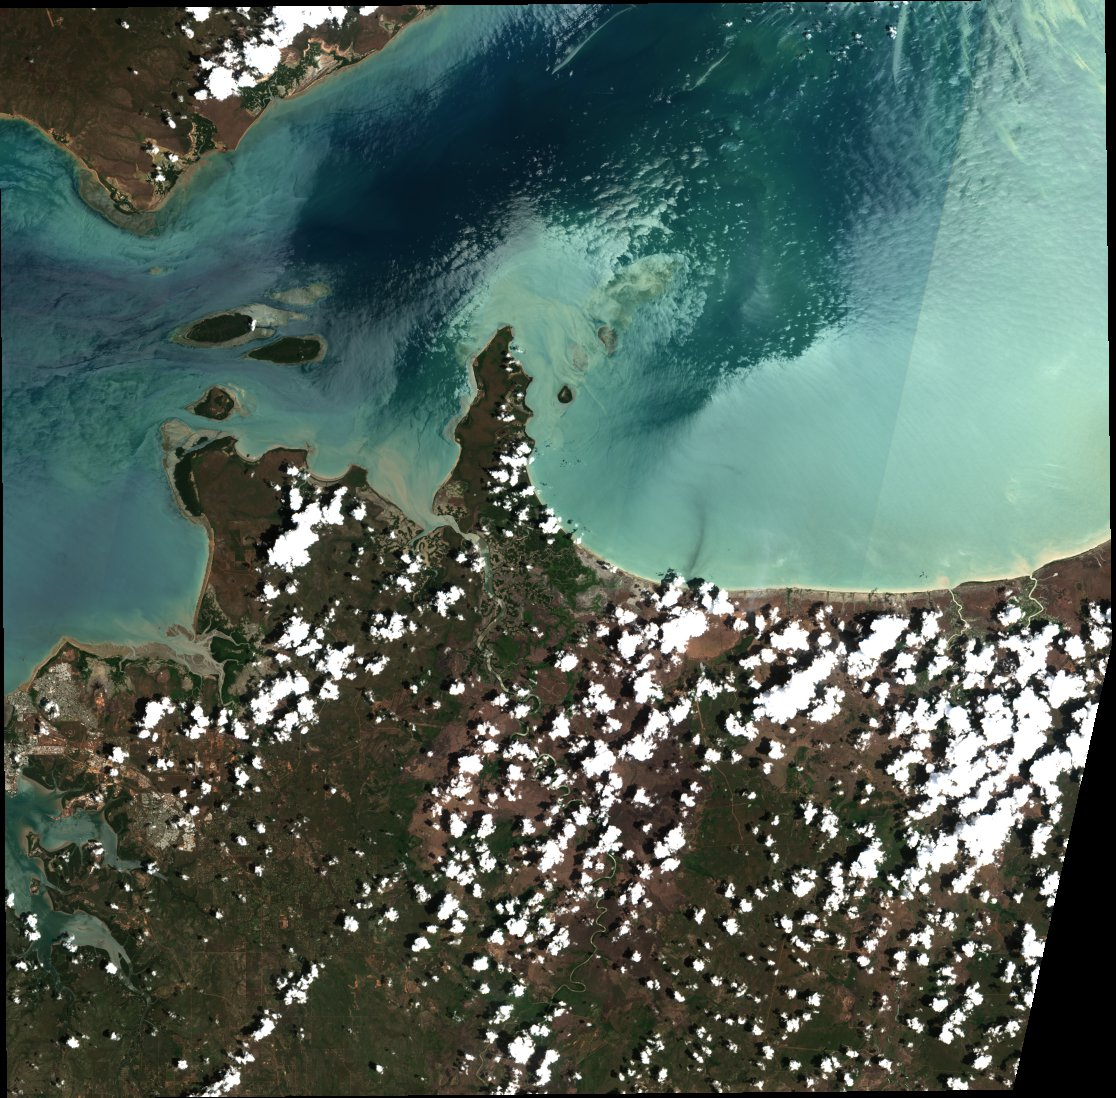

index: 10  Image: ga_s2am_nbart_3-2-1_52LGM_2023-12-10_final_thumbnail.jpg


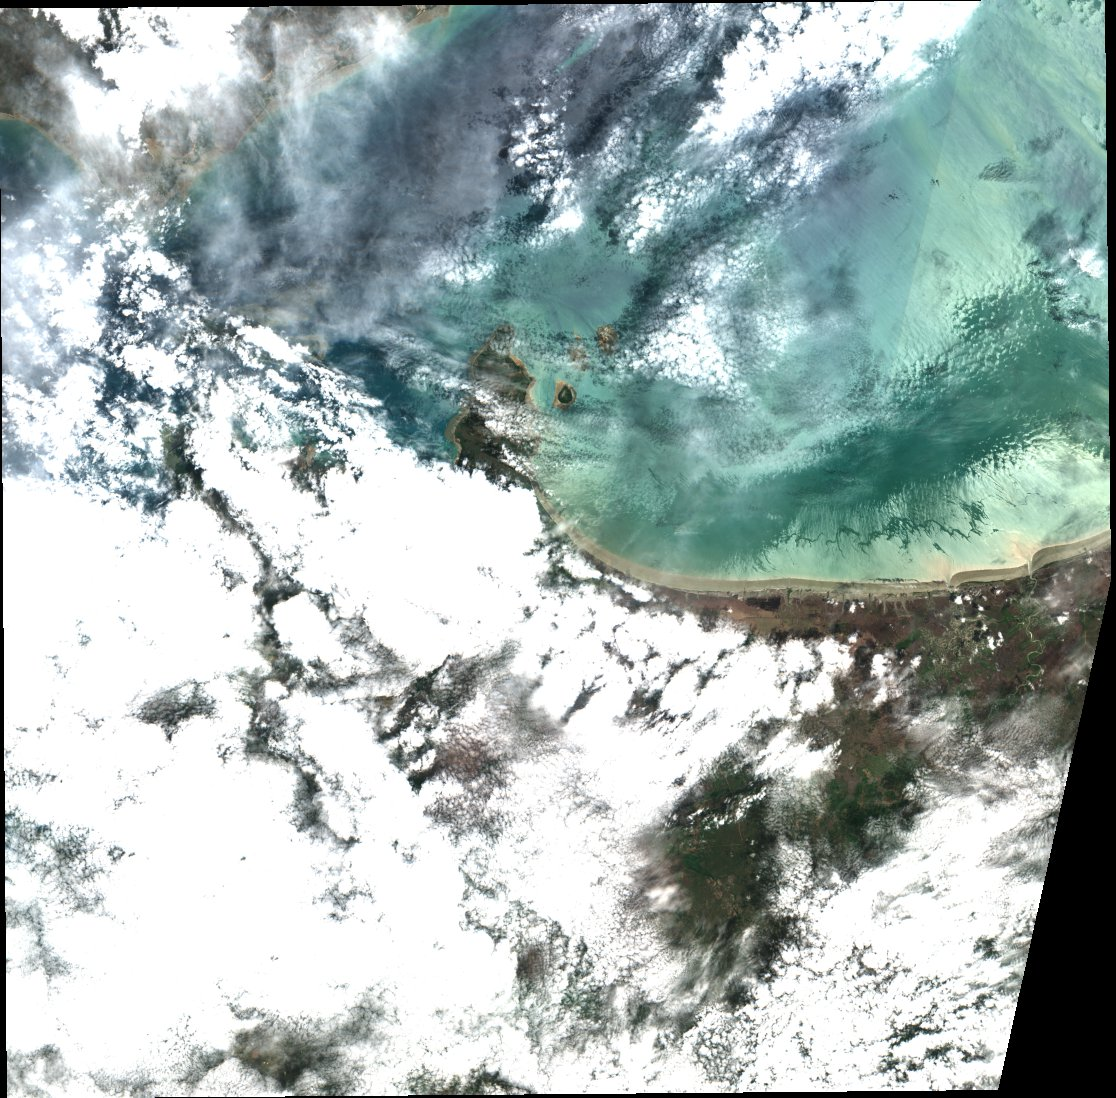

In [32]:
from IPython.display import Image

for i in cl.index:
    
    stac_item = data['features'][i]

    url = stac_item['assets']['thumbnail:nbart']['href']
    jpg = odc.aws.s3_download(url)
    print ('index:',i ,' Image:', jpg)
    display(Image(filename=jpg,width = 800, height = 800))
    os.remove(jpg) 

In [19]:
select = [34]

In [20]:
cd D:\data\working\lzolre_p113r081_d2023031520231025_dlwm0

D:\data\working\lzolre_p113r081_d2023031520231025_dlwm0


In [303]:
# if true dowload the slected bands
bands = ['nbart_blue','nbart_green','nbart_red','nbart_nir_1']
#bands = ['nbar_blue','nbar_green','nbar_red','nbar_nir_1']
#bands = ['nbart_coastal_aerosol','nbart_blue','nbart_green','nbart_red','nbart_nir','nbart_swir_1','nbart_swir_2']

for i in select: #cl.index:
    
    stac_item = data['features'][i]
    urls = [asset['href'] for asset in stac_item['assets'].values()]
    
    # make a directory to save the current S2 image into
    image_dir = (str(cl['title'][i]))
       
    os.makedirs(image_dir)
    os.chdir(image_dir)
    print (os.getcwd())
        
    for band in bands:
        url = stac_item['assets'][band]['href']
        odc.aws.s3_download(url)
        
    file_list = []
    
    for file in glob.glob("*.tif"):
        print (file)
        file_list.append(file)
    
    comp_file_name = file_list[0][:-10] + 'comp.tif'
    
    band_list = file_list

    # Read metadata of first file
    with rasterio.open(band_list[0]) as src0:
        meta = src0.meta

    # Update meta to reflect the number of layers
    meta.update(count= len(band_list))

    # Read each layer and write it to stack
    with rasterio.open(comp_file_name, 'w', **meta, compress='lzw') as dst:
        for id, layer in enumerate(band_list, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1))
                
    for file in band_list:
        os.remove(file) 
    print("Individual bands have been deleted")   

    os.chdir("..")
    print (os.getcwd())

D:\data\working\lzolre_p113r081_d2023031520231025_dlwm0\ga_s2am_ard_3-2-1_50JLL_2023-11-02_final
ga_s2am_nbart_3-2-1_50JLL_2023-11-02_final_band02.tif
ga_s2am_nbart_3-2-1_50JLL_2023-11-02_final_band03.tif
ga_s2am_nbart_3-2-1_50JLL_2023-11-02_final_band04.tif
ga_s2am_nbart_3-2-1_50JLL_2023-11-02_final_band08.tif
Individual bands have been deleted
D:\data\working\lzolre_p113r081_d2023031520231025_dlwm0


In [ ]:
ls